In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display dataset info
print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("\nTraining Data Columns:\n", train_data.columns)
print("\nMissing Values:\n", train_data.isnull().sum().sort_values(ascending=False).head(20))

# Display basic statistics
print("\nSummary Statistics:\n", train_data[['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath']].describe())

Training Data Shape: (1460, 81)
Test Data Shape: (1459, 80)

Training Data Columns:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'Gara

In [ ]:
# Select features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual', 'YearBuilt', 'LotArea']
target = 'SalePrice'

# Create feature and target datasets
X = train_data[features]
y = train_data[target]

# Handle missing values (simple imputation)
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=features)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Print model coefficients
print("Model Coefficients:")
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)
print(coefficients)
print("\nIntercept:", model.intercept_)

Model Coefficients:
        Feature   Coefficient
0     GrLivArea  34927.652140
3   OverallQual  32226.614866
4     YearBuilt  16231.112915
5       LotArea   8868.522900
2      FullBath  -2336.166974
1  BedroomAbvGr  -7146.909849

Intercept: 181441.54195205483


In [ ]:
# Make predictions
y_pred = model.predict(X_val_scaled)

# Calculate metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Create a results dataframe
results = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_pred,
    'Difference': y_val - y_pred
})
print("\nSample Predictions:\n", results.head(10))


Model Performance:
Mean Squared Error (MSE): 1694415146.41
Root Mean Squared Error (RMSE): 41163.27
R-squared (R²): 0.7791

Sample Predictions:
       Actual      Predicted    Difference
892   154500  143365.122402  11134.877598
1105  325000  309360.007248  15639.992752
413   115000  107403.029758   7596.970242
522   159000  167518.006849  -8518.006849
1036  315500  282466.010714  33033.989286
614    75500   83855.677348  -8355.677348
218   311500  219243.610937  92256.389063
1160  146000  167825.993134 -21825.993134
649    84500   83163.930974   1336.069026
887   135500  143850.537089  -8350.537089


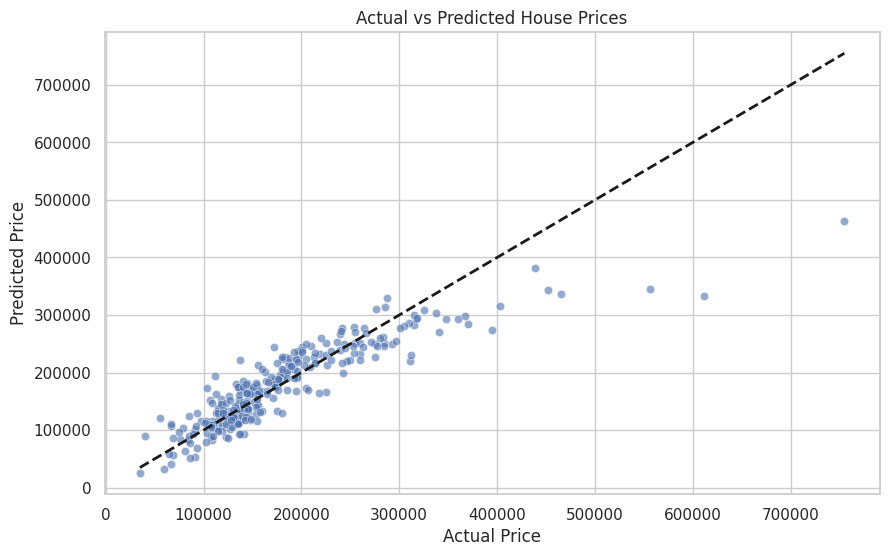

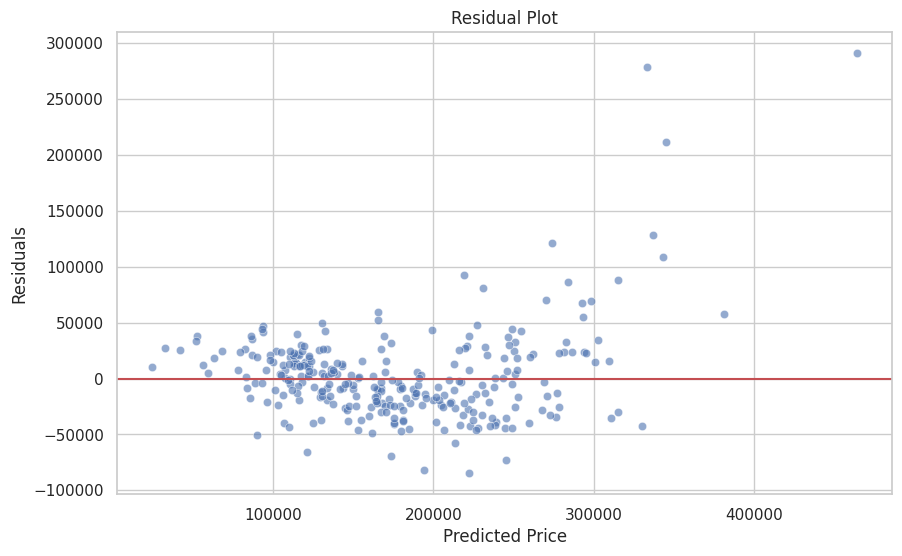

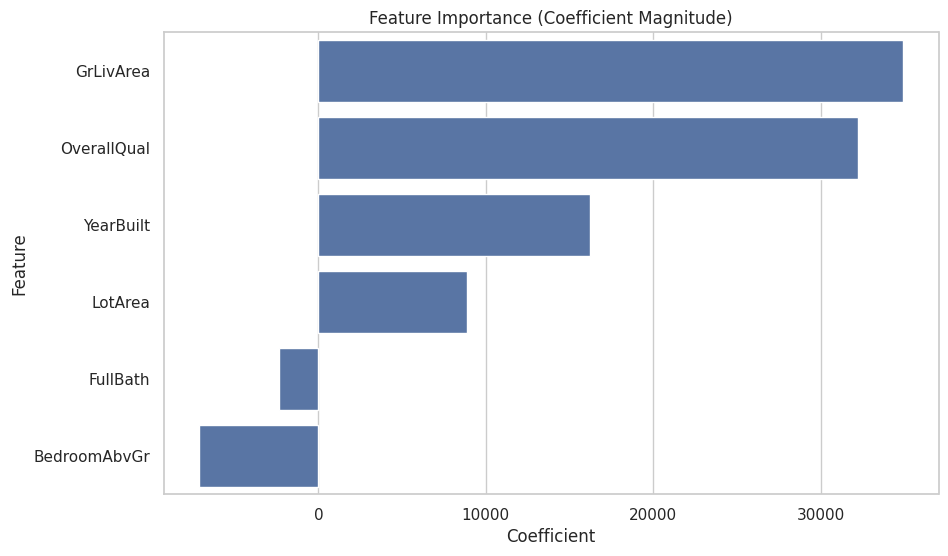

In [ ]:
# Set style
sns.set(style="whitegrid")

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Residual plot
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Coefficient Magnitude)')
plt.show()

In [ ]:
# Preprocess test data
X_test = test_data[features]
X_test = pd.DataFrame(imputer.transform(X_test), columns=features)
X_test_scaled = scaler.transform(X_test)

# Make predictions
test_predictions = model.predict(X_test_scaled)

# Create submission file
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("\nSubmission file created: submission.csv")


Submission file created: submission.csv
